![Titre](C03.jpg)

## <span style='color:#AC1620'> Explication du programme en langage Python</span>

### <span style='color:#163538'> Exercice 20 p 66  : Choix d'une méthode de titrage </span>

**Pour faire fonctionner le programme à l'aide de Jupyter Notebook, il faut exécuter les cellules contenant du code les unes après les autres** 

La première étape consiste à importer :
* le logarithme décimal *log10* de la bibliothèque <span style='color:red' > math </span> ;
* la bibliothèque <span style='color:red' > matplotlib.pyplot </span> avec l'alias *plt*. Elle sert à réaliser le graphique ;
* la bibliothèque <span style='color:red' > numpy </span> avec l'alias *np* . Elle est utile pour de nombreux outils mathématiques.

In [1]:
from math import log10
### Bibliothèques importées
import numpy as np
import matplotlib.pyplot as plt

On définit l'ensemble des constantes et variables utilisées dans ce programme :
* *CBi* est la concentration initiale en ions benzoate. Elle vaut $0,100~\mathrm{mol\cdot L^{-1}}$ ; 
* *CA* est la concentration de la solution titrante en ions oxonium $\mathrm{H_3O^+}$. Elle vaut $0,100~\mathrm{mol\cdot L^{-1}}$ ; 
* *V0* est le volume de la solution de benzoate de sodium, exprimé en mL. Il vaut $10~ \mathrm{mL}$ ; 
* *Ve* est le volume versé à l'équivalence, exprimé en mL. Il vaut $10~ \mathrm{mL}$.

In [2]:
### Définition des variables
'''CB, CBH, CH : liste des concentrations respectives des espèces B–,
BH, H3O+, du pH et du volume versé à l'équivalence'''
CBi,CA,V0,Ve = 0.1, 0.1, 10, 10

On crée cinq listes qui seront remplies ultérieurement dans le programme.
* _CB_ est une liste qui rassemble les concentrations en ions benzoate tout au long du titrage ; 
* _CBH_ est la liste qui rassemble les concentrations en acide benzoïque formé ; 
* _CH_ est la liste qui rassemble les concentrations en ions oxonium dans la solution ; 
* _pH_ est la  liste qui rassemble les valeurs du pH ; 
* _V_ est la liste qui rassemble les volumes versés en solution d'acide chlorhydrique. 

In [3]:
### Initialisation de 5 listes (concentrations en B-, BH, H+ et pH et volume
CB, CBH, CH, pH, V =[], [], [], [], []

On rentre dans une boucle dont les valeurs _VA_ vont de 1 à 26 mL par pas de 0,5 mL (``np.arange(1,26,0.5)``)
* Si le volume _VA_ est inférieur au volume équivalent défini précédemment, alors : 
    * On ajoute la valeur de _VA_ à la liste _V_ ; 
    * On ajoute la valeur de la concentration en ions benzoate qui réagit mol à mol avec l'ion oxonium : 
    $$[\mathrm{C_6H_5COO^-}] = \frac{\displaystyle CBi \times V0 - CA \times VA}{\displaystyle V0+VA}$$
    * La concentration acide benzoïque augmente selon la relation : 
       $$[\mathrm{C_6H_5COOH}]= \frac{\displaystyle CA \times VA}{\displaystyle V0+VA}$$
    * La concentration en ions oxonium reste négligeable : 
      $$[\mathrm{H_3O^+}]= 0~\mathrm{mol\cdot L^{-1}}$$
    * Le pH est celui d'une solution mélangeant un acide faible et sa base conjuguée : 
    $$pH = \mathrm{pKa} + \log \left(\frac{\displaystyle [\mathrm{C_6H5COO^-}]}{\displaystyle [\mathrm{C_6H5COOH}]} \right)$$ soit $$pH = 4,2 + \log \left(\frac{\displaystyle CBi \times V0 - CA \times VA}{\displaystyle CA \times VA} \right)$$

* Si le volume _VA_ est supérieur au volume équivalent *Ve* défini précédemment, alors : 
    * On ajoute la valeur de _VA_ à la liste _V_ ; 
    * On ajoute la valeur de la concentration en ion benzoate est nulle : 
    $$[\mathrm{C_6H_5COO^-}] =0~\mathrm{mol\cdot L^{-1}}$$
    * La concentration en acide benzoïque n'évolue plus au-delà du volume _Ve_: 
       $$[\mathrm{C_6H_5COOH}]= \frac{\displaystyle CA \times Ve}{\displaystyle V0+VA}$$
    * La concentration en ions oxonium augmente au fur et à mesure de l'ajout de la solution titrante : 
      $$[\mathrm{H_3O^+}]= \frac{\displaystyle CA \times (VA-Ve)}{\displaystyle V0+VA}$$
    * Le pH est celui d'une solution d'acide fort : 
    $$pH = - \log \left( \frac{ [\mathrm{H_3O^+}]}{C^0}\right)$$ soit $$pH = - log \left( \frac{\displaystyle CA \times (VA-Ve)}{\displaystyle V0+VA} \right)$$

In [4]:
### Remplissage des 5 listes suivant le volume VA versé
for VA in np.arange(1,26,0.5) :
    if VA < Ve :
        V.append(VA)
        CB.append((CBi*V0-CA*VA)/(V0+VA))
        CBH.append((CA*VA/(V0+VA)))
        CH.append(0)
        pH.append(4.2 + log10((0.1*V0-CA*VA)/(CA*VA)))
    elif VA > Ve:
        V.append(VA)
        CB.append(0)
        CBH.append((CA*Ve/(V0+VA)))
        CH.append((CA*(VA-Ve))/(V0+VA))
        pH.append(-log10(CA*(VA-Ve)/(VA+V0)))

On trace le graphique à l'aide des fonctions de la bibliothèque <span style='color:red' > matplotlib.pyplot </span>.

On crée une figure de 1600 pixels de large sur 1000 pixels de haut à l'aide de la commande (``plt.figure(figsize=(16,10))``)
On crée deux sous-figures à l'aide de la commande ``plt.subplot()``.

Pour chaque sous-figure : 
* ``plt.plot(x,y,args)`` permet de tracer la courbe souhaitée;
* ``plt.legend()`` permet d'insérer sur le graphique une légende pour chacune des courbes ;
* ``plt.ylim()`` permet de fixer les limites de l'axe des ordonnées.

Enfin,  ``plt.show()`` permet d'afficher le graphique.

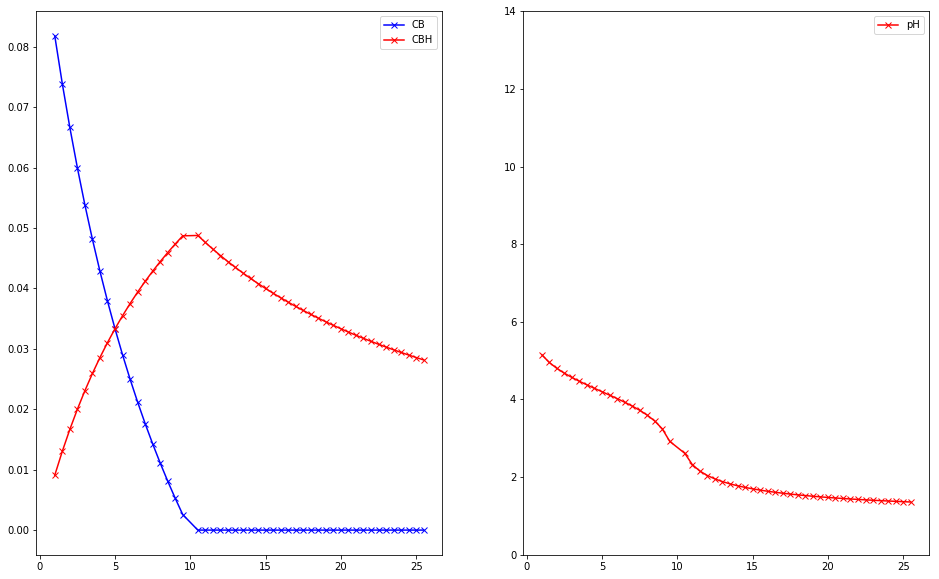

In [7]:
### Affichage des graphiques
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.plot(V, CB, 'bx-', label="CB")
plt.plot(V, CBH, 'rx-', label="CBH")
plt.legend()
plt.subplot(122)
plt.ylim(0,14)
plt.plot(V, pH, 'rx-', label="pH")
plt.legend()
plt.show()